In [1]:
include("figures-preamble.jl")

INFO: Recompiling stale cache file /Users/johnwormell/.julia/lib/v0.4/PyPlot.ji for module PyPlot.
INFO: Recompiling stale cache file /Users/johnwormell/.julia/lib/v0.4/PyCall.ji for module PyCall.
INFO: Recompiling stale cache file /Users/johnwormell/.julia/lib/v0.4/Conda.ji for module Conda.
INFO: Recompiling stale cache file /Users/johnwormell/.julia/lib/v0.4/BinDeps.ji for module BinDeps.
INFO: Recompiling stale cache file /Users/johnwormell/.julia/lib/v0.4/URIParser.ji for module URIParser.
INFO: Recompiling stale cache file /Users/johnwormell/.julia/lib/v0.4/SHA.ji for module SHA.
INFO: Recompiling stale cache file /Users/johnwormell/.julia/lib/v0.4/MacroTools.ji for module MacroTools.
INFO: Recompiling stale cache file /Users/johnwormell/.julia/lib/v0.4/ColorTypes.ji for module ColorTypes.
INFO: Recompiling stale cache file /Users/johnwormell/.julia/lib/v0.4/FixedPointNumbers.ji for module FixedPointNumbers.
    floattype(Type{#T<:FixedPointNumbers.Fixed}) at /Users/johnwormell/

## setup together

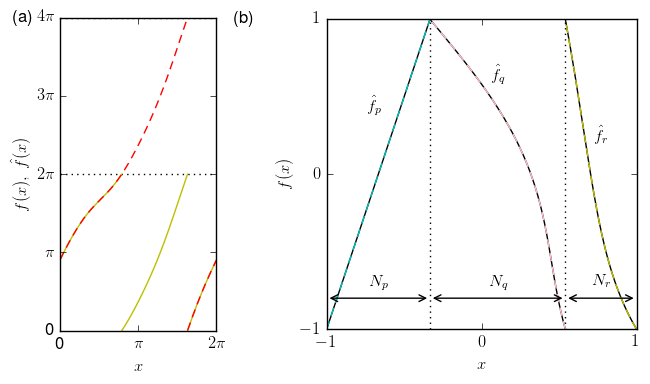

In [5]:
figure(figsize=(7,4))

# setup-2
subplot(1,2,1)

fh(x) = 2x + sin(sin(x+3/2))+2

gca()[:set_aspect]("equal")
pts = linspace(0,2pi,1000)
xlim(0,2pi); ylim(0,4pi)
for i = 1:2
    plot(pts,fill(i*2pi,size(pts)),"k:")
    ptsrn = pts[findfirst(fh(pts) .> (i-1)*2pi):(findfirst(fh(pts) .> i*2pi)-1)]
    plot(ptsrn,fh(ptsrn)-(i-1)*2pi,"y",linewidth=1)
end

ptsrn = pts[findfirst(fh(pts) .> 2*2pi):end]
plot(ptsrn,fh(ptsrn)-2*2pi,"y",linewidth=1)
plot(ptsrn,fh(ptsrn)-2*2pi,"r",dashes=(6,4))

ptsrn = pts[1:findfirst(fh(pts) .> 2*2pi)-1]
plot(ptsrn,fh(ptsrn),"r",dashes=(6,4))

xticks(0:pi:2pi,["0","\$\\pi\$","\$2\\pi\$"])
yticks(0:pi:4pi,["0","\$\\pi\$","\$2\\pi\$","\$3\\pi\$","\$4\\pi\$"])


xlabel("\$x\$")
ylabel("\$f(x),\\ \\hat f(x)\$")

gca()[:text](-0.3, 1.0, "(a)",
horizontalalignment="left",
verticalalignment="center",
transform=gca()[:transAxes])


# setup-2

subplot(1,2,2)
gca()[:set_aspect]("equal")
pts = linspace(-1,1,1000)
v1(x) = (x-2)/3
v2(x) = -1/3 + (1-x)/2 + sin(4*(1-x)/2)/6
v3(x) = 1-(1/3-sin(4)/6)*(1+x)/2-(1-x.^2).*exp(-x)/15
plot(v1(pts),pts,"k")
plot(v2(pts),pts,"k")
plot(v3(pts),pts,"k")
plot(v1(pts),pts,"c",dashes=(6,4))
plot(v2(pts),pts,"pink",dashes=(6,4))
plot(v3(pts),pts,"y",dashes=(6,4))

xticks([0])
yticks([-1,0,1],["-1","0","1"])
vlines(-1/3,-1,1,linestyle=":")
vlines(2/3+sin(4)/6,-1,1,linestyle=":")


text(-2/3,-0.73,"\$N\_p\$",horizontalalignment="center")
 annotate("", (-1., -0.8), (-1/3, -0.8),arrowprops=Dict("arrowstyle"=>"<->"))

text(1/6+sin(4)/12,-0.73,"\$N\_q\$",horizontalalignment="center")
annotate("", (-1/3, -0.8), (2/3+sin(4)/6, -0.8),arrowprops=Dict("arrowstyle"=>"<->"))

text(5/6+sin(4)/12,-0.73,"\$N\_r\$",horizontalalignment="center")
annotate("", (2/3+sin(4)/6, -0.8), (1., -0.8),arrowprops=Dict("arrowstyle"=>"<->"))

text(-2/3-0.03,0.4,"\$\\hat f\_p\$",horizontalalignment="center")
text(1/6+sin(4)/12-0.0,0.6,"\$\\hat f\_q\$",horizontalalignment="center")
text(5/6+sin(4)/12-0.0,0.2,"\$\\hat f\_r\$",horizontalalignment="center")

xticks([-1,0,1],["\$-1\$","\$0\$","\$1\$"])
yticks([-1,0,1],["\$-1\$","\$0\$","\$1\$"])


xlabel("\$x\$")
ylabel("\$f(x)\$")
gca()[:text](-0.3, 1.0, "(b)",
    horizontalalignment="left",
    verticalalignment="center",
    transform=gca()[:transAxes])

tight_layout()
savefig("../figures/setup.eps")